# Elementos básicos del cluster analysis

En este "notebook" exploramos lo básico de cluster analysis con k-means

## Importar las librerías relevantes

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Utilizar los estilos de Seaborn
sns.set()
# Importar el módulo KMeans para usar k-means clustering con sklearn
from sklearn.cluster import KMeans

## cargar los datos

In [12]:
datos = pd.read_csv('Paises_Mundo.csv')

In [13]:
# Darle un vistazo a los datos
datos

,Country,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Graficar los datos

<function matplotlib.pyplot.show(close=None, block=None)>

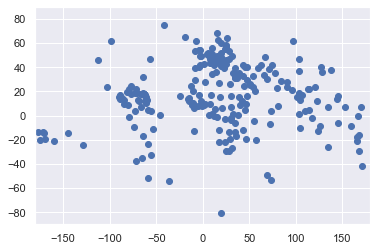

In [14]:
# Utilizar el código más simple posible para crear una gráfica de dispersión usando longitud y latitud
# Nótese que para obtener un resultado que se asemeje al mapa mundi, debemos usar la longitud como y, y la latitud como x

plt.scatter(datos['Longitude'],datos['Latitude'])

# Fijar límites a los ejes, a semejanza del mapa mundi

plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Elegir las características (features) para agrupar por ubicación

In [15]:
x = datos.filter(["Latitude", "Longitude"])
x

,Latitude,Longitude
0,12.520880,-69.982677
1,33.835231,66.004734
2,-12.293361,17.537368
3,18.223959,-63.064989
4,41.142450,20.049834
...,...,...
236,-13.753243,-172.164851
237,15.909280,47.586762
238,-29.000341,25.083901
239,-13.458242,27.774759


## Clustering

Esta es la parte donde empieza el agrupamiento

In [16]:
# Crear un objeto (que llamaremos kmeans)
# El número en los paréntesis es K, el número de grupos que deseamos

kmeans = KMeans(2)

In [17]:
# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)

kmeans.fit(x)

KMeans(n_clusters=2)

## Resultados del Clustering

Hay muchas formas de realizar esta parte, esta es una de las más ilustrativas

In [18]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados = kmeans.fit_predict(x)

# Revisar los resultados

clusters_identificados

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [19]:
# Crear una copia de los datos

datos_con_clusters = datos.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

datos_con_clusters['Cluster'] = clusters_identificados

# Revisar el resultado

datos_con_clusters

,Country,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


### Uso de Plotly Express para generar gráfica interactiva

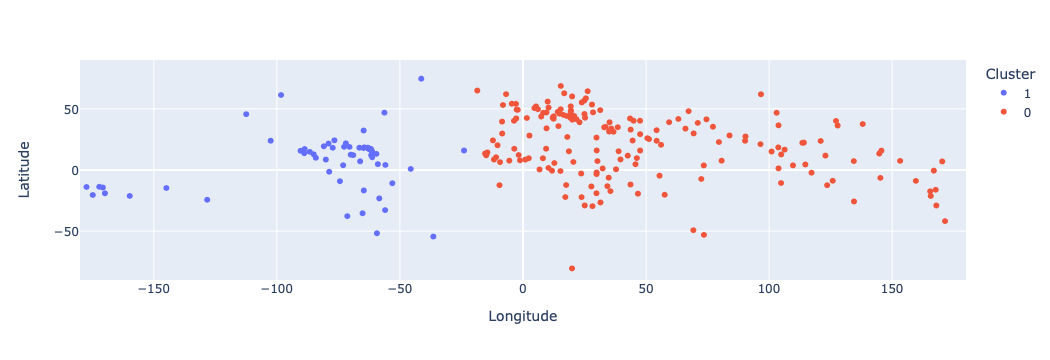

In [20]:
#Graficar los datos utilizando la longitud y latitud
# color es un argumento que se puede codificar con una variable
# Todos los puntos en cada cluster tendran el mismo color

datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters, 
                 x = "Longitude", 
                 y = "Latitude", 
                 color = "Cluster",
#                 size='', 
                 hover_data = ['Country']
                )
fig.update_xaxes(range=[-180, 180])
fig.update_yaxes(range=[-90, 90])

fig.show()

### Y, si queremos con tres grupos???

Lo único que hay que hacer es cambiar el 2 por el 3 y repetir todos los pasos